In [1]:
import json
import googlemaps
from datetime import datetime

In [2]:
# Zage 3 Restro Cafe
# Bowlful Bites
# ROTI (Revenue Officers' Training Institute)


In [171]:
dict_places = {
    # 0: (20.294766554410437, 85.74336649575216),
    1: (20.289392134840174, 85.74188592015321),
    2: (20.28595147758, 85.75135547779522),
    3: (20.293225116208706, 85.73277612608766),
    # "PP4": "7PVR+GQ3, Gothapatna, Odisha 751003",
    # "PP5": "7PQP+8VR, Nuagan, Odisha 752054",
    # "PP6": "IIIT Campus, near STPI, Gothapatna, Odisha 751003",
    # "PP7": "7PVR+6XM, Bhubaneswar, Gothapatna, Odisha 751003",
    # "PP8": "7PRR+WG5, Gothapatna, Odisha 751003",
    # "PP9": "The SG's Kitchen, near Bandita Imperials, IIIT Square, Gothapatna, Bhubaneswar, Odisha 751003",
    # "PP10": "IDCO Plot No. 2, Institutional Area, Gothapatna, Bhubaneswar, Odisha 751029",
}

In [58]:
now = datetime.now()

In [59]:
source = (20.294766554410437, 85.74336649575216)

In [60]:
dest = dict_places.keys()

In [61]:
for i in dest:
    print(i)

1
2
3


In [62]:
dest_to_index = {
    
}

In [63]:
temp = [1,2,3,4]


In [64]:
combinations = []

In [65]:
for i in range(len(dest)):
    for j in range(1, len(dest)):
        combinations.append((i,j))

In [66]:
len(combinations)

6

In [149]:
from geopy.distance import geodesic as GD
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36")
Mumbai = (19.0760, 72.8777)
Pune = (18.5204, 73.8567)
 
print("The distance between Mumbai and Pune is: ", GD(Mumbai,Pune).km)

The distance between Mumbai and Pune is:  120.13816971268406


In [150]:
def cal_dist(place1, place2):
    return GD(place1,place2).km

In [151]:
cal_dist(Mumbai, Pune)

120.13816971268406

In [152]:
#now implementng genetic algorithm

In [153]:
source = (20.294750510722377, 85.74338433480382)



In [177]:
while(True):
    location_name = input("Enter your current location : ")
    break

Enter your current location :  International Institute of Information Technology Bhubaneswar


In [175]:
city_names = [1, 2, 3]
start = 0

In [178]:
location = geolocator.geocode(location_name)

In [179]:
location.longitude

85.74402934096034

In [180]:
dict_places[0] = (location.latitude, location.longitude)

In [181]:
dict_places

{1: (20.289392134840174, 85.74188592015321),
 2: (20.28595147758, 85.75135547779522),
 3: (20.293225116208706, 85.73277612608766),
 0: (20.295150800000002, 85.74402934096034)}

In [182]:
from copy import copy
import numpy as np
np.random.seed(42)


def create_guess(cities, start):

    guess = copy(cities)

    np.random.shuffle(guess)
    guess.append(start)
    guess.insert(0,start)
    return list(guess)

create_guess(city_names, start)

[0, 1, 2, 3, 0]

In [183]:
def create_generation(cities, population=100):

    generation = [create_guess(cities, start) for _ in range(population)]
    return generation

test_generation = create_generation(city_names, population=10)
print(test_generation)

[[0, 2, 3, 1, 0], [0, 1, 2, 3, 0], [0, 2, 3, 1, 0], [0, 1, 2, 3, 0], [0, 2, 1, 3, 0], [0, 2, 1, 3, 0], [0, 3, 2, 1, 0], [0, 1, 2, 3, 0], [0, 3, 2, 1, 0], [0, 1, 3, 2, 0]]


In [184]:
def fitness_score(guess):

    score = 0
    for ix, city_id in enumerate(guess[:-1]):
        # print(ix)
        score += cal_dist(dict_places[city_id], dict_places[guess[ix+1]])
    return score

def check_fitness(guesses):
 
    fitness_indicator = []
    for guess in guesses:
        fitness_indicator.append((guess, fitness_score(guess)))
    return fitness_indicator

print(check_fitness(test_generation))

[([0, 2, 3, 1, 0], 5.092596998585341), ([0, 1, 2, 3, 0], 5.031369202383237), ([0, 2, 3, 1, 0], 5.092596998585341), ([0, 1, 2, 3, 0], 5.031369202383237), ([0, 2, 1, 3, 0], 4.5703193980268715), ([0, 2, 1, 3, 0], 4.5703193980268715), ([0, 3, 2, 1, 0], 5.031369202383237), ([0, 1, 2, 3, 0], 5.031369202383237), ([0, 3, 2, 1, 0], 5.031369202383237), ([0, 1, 3, 2, 0], 5.092596998585341)]


In [185]:
def get_breeders_from_generation(guesses, take_best_N=10, take_random_N=5, verbose=False, mutation_rate=0.1):

    fit_scores = check_fitness(guesses)
    sorted_guesses = sorted(fit_scores, key=lambda x: x[1])
    new_generation = [x[0] for x in sorted_guesses[:take_best_N]]
    best_guess = new_generation[0]
    
    if verbose:
    
        print(best_guess)
    
   
    for _ in range(take_random_N):
        ix = np.random.randint(len(guesses))
        new_generation.append(guesses[int(ix)])
        

    
    np.random.shuffle(new_generation)
    return new_generation, best_guess

def make_child(parent1, parent2):

    list_of_ids_for_parent1 = list(np.random.choice(parent1, replace=False, size=len(parent1)//2))
    child = [-99 for _ in parent1]
    
    for ix in list_of_ids_for_parent1:
        # print("List is: ", list_of_ids_for_parent1)
        # ix = int(ix)
        child[ix] = parent1[ix]
    for ix, gene in enumerate(child):
        # ix = int(ix)
        if gene == -99:
            for gene2 in parent2:
                if gene2 not in child:
                    child[ix] = gene2
                    break
    child[-1] = child[0]
    return child

def make_children(old_generation, children_per_couple=1):

    mid_point = len(old_generation)//2
    next_generation = [] 
    
    for ix, parent in enumerate(old_generation[:mid_point]):
        for _ in range(children_per_couple):
            next_generation.append(make_child(parent, old_generation[-ix-1]))
    return next_generation

In [186]:
current_generation = create_generation(city_names,population=500)
print_every_n_generations = 5

for i in range(100):
    if not i % print_every_n_generations:
        print("Generation %i: "%i, end='')
        print(len(current_generation))
        is_verbose = True
    else:
        is_verbose = False
    breeders, best_guess = get_breeders_from_generation(current_generation, 
                                                        take_best_N=250, take_random_N=100, 
                                                        verbose=is_verbose)
    current_generation = make_children(breeders, children_per_couple=3)
    

Generation 0: 500
[0, 2, 1, 3, 0]
Generation 5: 525
[0, 2, 1, 3, 0]
Generation 10: 525
[0, 3, 1, 2, 0]
Generation 15: 525
[0, 2, 1, 3, 0]
Generation 20: 525
[0, 3, 1, 2, 0]
Generation 25: 525
[0, 3, 1, 2, 0]
Generation 30: 525
[0, 3, 1, 2, 0]
Generation 35: 525
[0, 3, 1, 2, 0]
Generation 40: 525
[0, 3, 1, 2, 0]
Generation 45: 525
[0, 3, 1, 2, 0]
Generation 50: 525
[0, 3, 1, 2, 0]
Generation 55: 525
[0, 3, 1, 2, 0]
Generation 60: 525
[0, 3, 1, 2, 0]
Generation 65: 525
[0, 3, 1, 2, 0]
Generation 70: 525
[0, 3, 1, 2, 0]
Generation 75: 525
[0, 3, 1, 2, 0]
Generation 80: 525
[0, 3, 1, 2, 0]
Generation 85: 525
[0, 3, 1, 2, 0]
Generation 90: 525
[0, 3, 1, 2, 0]
Generation 95: 525
[0, 3, 1, 2, 0]


In [187]:
def evolve_to_solve(current_generation, max_generations, take_best_N, take_random_N,
                    mutation_rate, children_per_couple, print_every_n_generations, verbose=False):

    fitness_tracking = []
    for i in range(max_generations):
        if verbose and not i % print_every_n_generations and i > 0:
            print("Generation %i: "%i, end='')
            print(len(current_generation))
            print("Current Best Score: ", fitness_tracking[-1])
            is_verbose = True
        else:
            is_verbose = False
        breeders, best_guess = get_breeders_from_generation(current_generation, 
                                                            take_best_N=take_best_N, take_random_N=take_random_N, 
                                                            verbose=is_verbose, mutation_rate=mutation_rate)
        fitness_tracking.append(fitness_score(best_guess))
        current_generation = make_children(breeders, children_per_couple=children_per_couple)
    
    return fitness_tracking, best_guess

current_generation = create_generation(city_names,population=500)
fitness_tracking, best_guess = evolve_to_solve(current_generation, 100, 150, 70, 0.5, 3, 5, verbose=True)

Generation 5: 330
Current Best Score:  4.5703193980268715
[0, 2, 1, 3, 0]
Generation 10: 330
Current Best Score:  4.5703193980268715
[0, 2, 1, 3, 0]
Generation 15: 330
Current Best Score:  4.5703193980268715
[0, 2, 1, 3, 0]
Generation 20: 330
Current Best Score:  4.5703193980268715
[0, 2, 1, 3, 0]
Generation 25: 330
Current Best Score:  4.5703193980268715
[0, 2, 1, 3, 0]
Generation 30: 330
Current Best Score:  4.5703193980268715
[0, 2, 1, 3, 0]
Generation 35: 330
Current Best Score:  4.5703193980268715
[0, 2, 1, 3, 0]
Generation 40: 330
Current Best Score:  4.5703193980268715
[0, 2, 1, 3, 0]
Generation 45: 330
Current Best Score:  4.5703193980268715
[0, 2, 1, 3, 0]
Generation 50: 330
Current Best Score:  4.5703193980268715
[0, 2, 1, 3, 0]
Generation 55: 330
Current Best Score:  4.5703193980268715
[0, 2, 1, 3, 0]
Generation 60: 330
Current Best Score:  4.5703193980268715
[0, 2, 1, 3, 0]
Generation 65: 330
Current Best Score:  4.5703193980268715
[0, 2, 1, 3, 0]
Generation 70: 330
Current

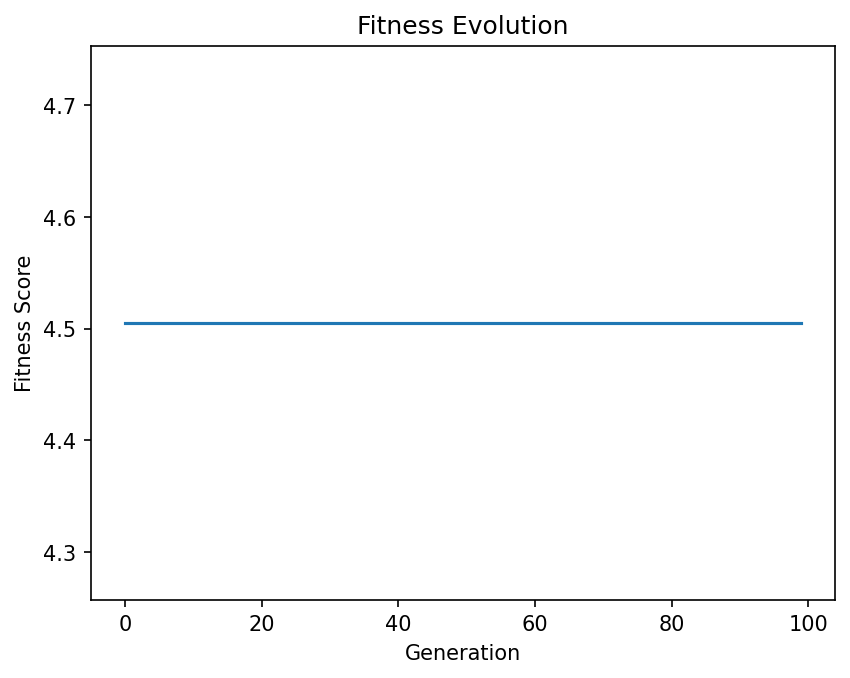

In [111]:
def make_fitness_tracking_plot(fitness_tracking):
    import matplotlib.pyplot as plt 
    plt.figure(dpi=150)
    plt.plot(range(len(fitness_tracking)), fitness_tracking)
    plt.ylabel("Fitness Score")
    plt.xlabel("Generation")
    plt.title("Fitness Evolution");

make_fitness_tracking_plot(fitness_tracking)